### Importation des librairies

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# création de cartes
import folium
import pandas as pd
from branca.colormap import LinearColormap

# Divers
from utils import dataframe_info, racine_projet

In [69]:
master_df = pd.read_csv(racine_projet()+'/data/processed/dataviz.csv', low_memory = False)

In [70]:
dataframe_info(master_df)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,DateAndTimeMobilised,2365940,0,0.00,object,2009-01-01 00:02:27
1,DateAndTimeMobile,2338168,27772,1.17,object,2009-01-01 00:06:40
2,DateAndTimeArrived,2365940,0,0.00,object,2009-01-01 00:07:46
3,AttendanceTimeSeconds,2365940,0,0.00,int64,319
4,DateAndTimeLeft,2319613,46327,1.96,object,2009-01-01 00:16:46
5,DeployedFromStation_Name,2365917,23,0.00,object,Battersea
6,DeployedFromLocation,2364778,1162,0.05,object,Home Station
7,PumpOrder,2365940,0,0.00,int64,1
8,PlusCode_Description,2365940,0,0.00,object,Initial Mobilisation
9,IncidentGroup,2365940,0,0.00,object,Special Service


### Nettoyage des tableaux pour les plots

In [71]:
# Suppresion pour cause d'inutilité ou de doublon
variables_drop =['DateAndTimeCalled',
                 'DateAndTimeMobile',
                 'DateAndTimeArrived',
                 'DateAndTimeLeft',
                 "UPRN",
                 "USRN",
                 "AttendanceTimeSeconds",
                 "FirstPumpArriving_AttendanceTime",
                 "SecondPumpArriving_AttendanceTime",
                 "PumpOrder",
                 "PumpMinutesRounded",
                 "Notional Cost (£)"]
master_df = master_df.drop(labels = variables_drop, axis = 1)

### Distribution de la valeur target

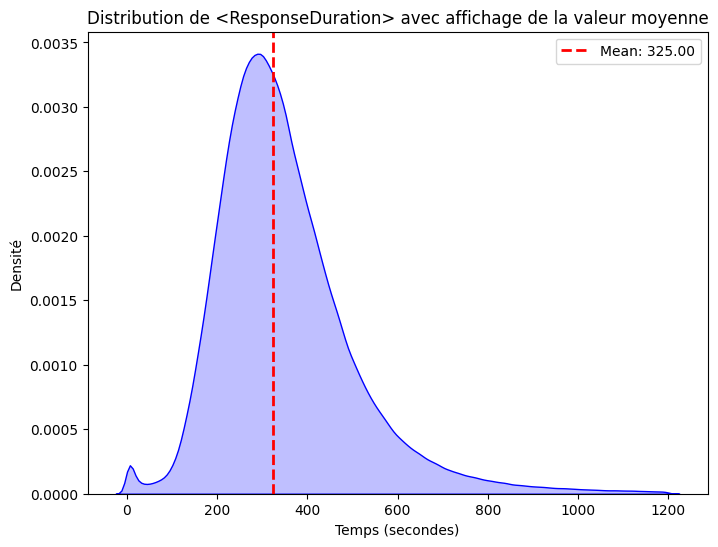

In [72]:
mean_value = master_df['ResponseDuration'].median()

# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(master_df['ResponseDuration'], fill = True, color='blue')

# Ajouter une ligne verticale pour la moyenne
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Ajouter des titres et des étiquettes
plt.title('Distribution de <ResponseDuration> avec affichage de la valeur moyenne')
plt.xlabel('Temps (secondes)')
plt.ylabel('Densité')
plt.legend()

# Afficher le graphique
plt.savefig(racine_projet()+'/reports/figures/target_distribution.png', bbox_inches='tight')
plt.show()


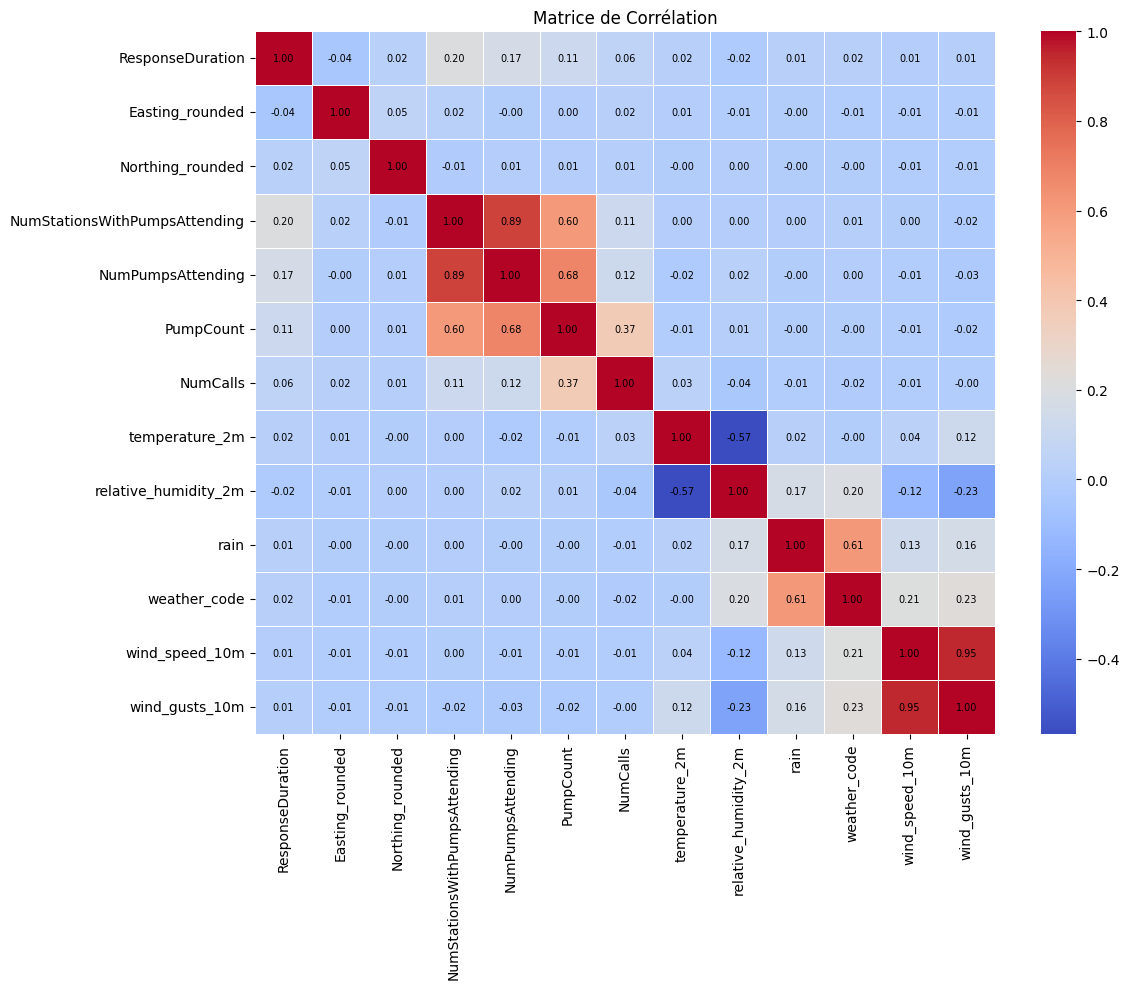

In [73]:
df_numeric = master_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()

# On remet responseDuration au centre de la matrice de correlation
variable_centre = 'ResponseDuration'
columns = [variable_centre] + [col for col in corr_matrix.columns if col != variable_centre]
corr_matrix = corr_matrix.loc[columns, columns]

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 7, "color": "black"})
plt.title('Matrice de Corrélation')
plt.tight_layout()

plt.savefig(racine_projet()+'/reports/figures/corr_matrix.png', bbox_inches='tight')

plt.show()


### Graphiques MAPS

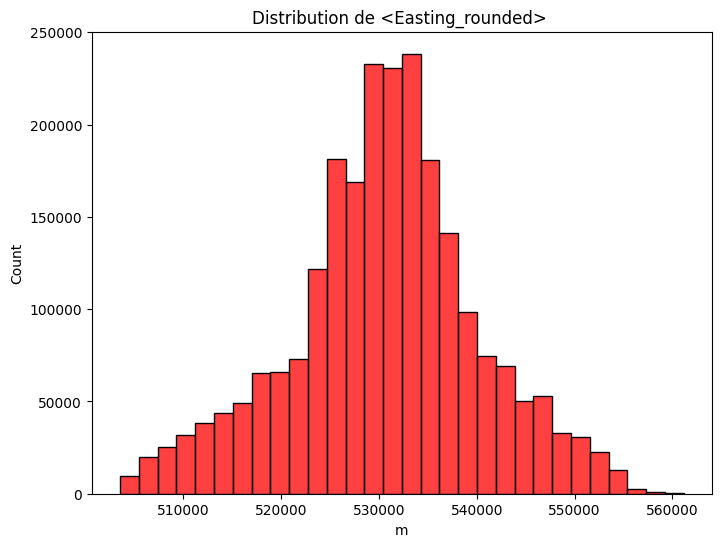

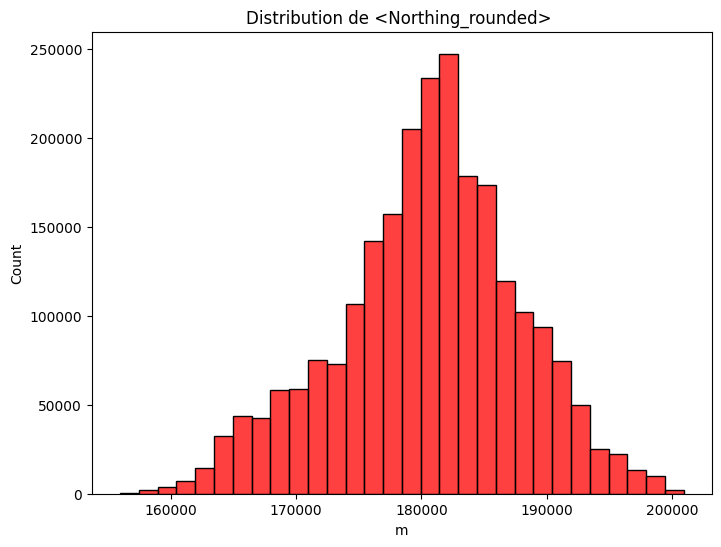

In [15]:
# KDE plot EASTING
plt.figure(figsize=(8, 6))
sns.histplot(master_df['Easting_rounded'], bins = 30, color='red')

plt.title('Distribution de <Easting_rounded> ')
plt.xlabel('m');

plt.savefig(racine_projet()+'/reports/figures/distrib_easting.png')


# KDE plot NORTHING
plt.figure(figsize=(8, 6))
sns.histplot(master_df['Northing_rounded'], bins = 30, color='red')

plt.title('Distribution de <Northing_rounded> ')
plt.xlabel('m');

plt.savefig(racine_projet()+'/reports/figures/distrib_northing.png', bbox_inches='tight')



/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_24017/2693591468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_northing = master_df.groupby('Northing_binned')['ResponseDuration'].median().reset_index()
/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_24017/2693591468.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_easting = master_df.groupby('Easting_binned')['ResponseDuration'].median().reset_index()
/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_24017/2693591468.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

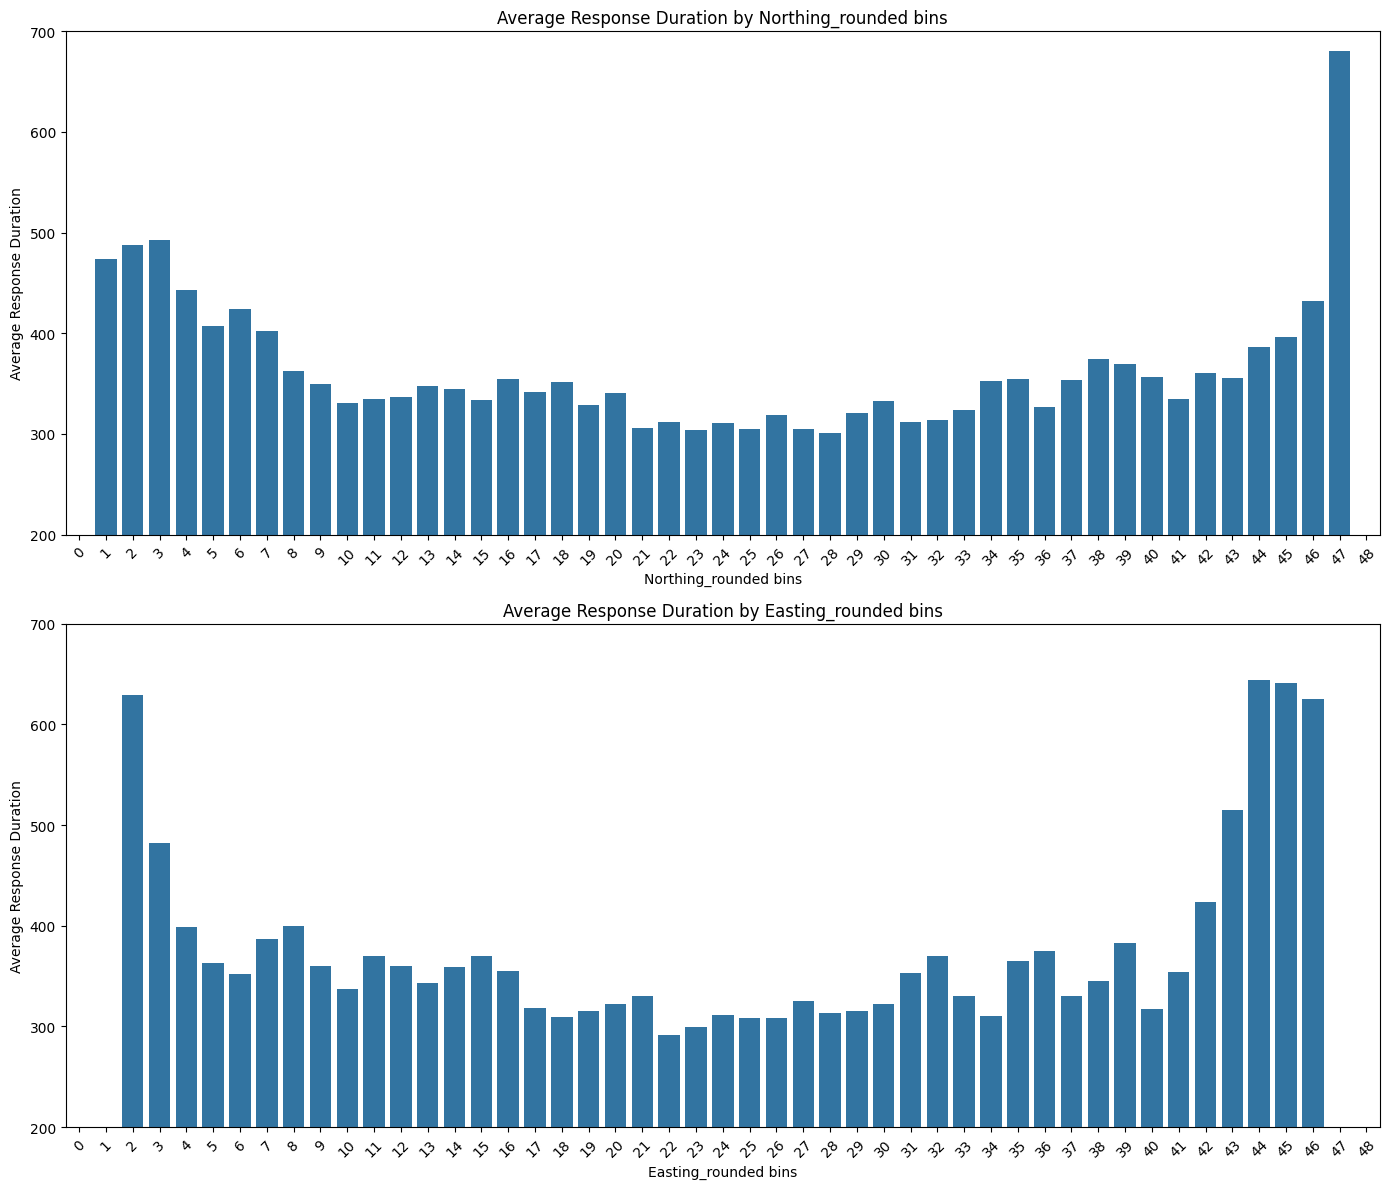

In [16]:
# Définir les bins pour Northing_rounded
bins_northing = np.linspace(154000, 202000, 50)
master_df['Northing_binned'] = pd.cut(master_df['Northing_rounded'], bins_northing)

# Groupby pour calculer la moyenne de ResponseDuration par bins de Northing_rounded
grouped_northing = master_df.groupby('Northing_binned')['ResponseDuration'].median().reset_index()

# Préparation des données pour l'affichage
grouped_northing['Northing_binned'] = grouped_northing['Northing_binned'].astype(str)

# Définir les bins pour Easting_rounded
bins_easting = np.linspace(500000, 565000, 50)
master_df['Easting_binned'] = pd.cut(master_df['Easting_rounded'], bins_easting)

# Groupby pour calculer la moyenne de ResponseDuration par bins de Easting_rounded
grouped_easting = master_df.groupby('Easting_binned')['ResponseDuration'].median().reset_index()

# Préparation des données pour l'affichage
grouped_easting['Easting_binned'] = grouped_easting['Easting_binned'].astype(str)

# Création des subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot pour Northing
sns.barplot(x='Northing_binned', y='ResponseDuration', data=grouped_northing, ax=axes[0])
axes[0].set_xlabel('Northing_rounded bins')
axes[0].set_ylabel('Average Response Duration')
axes[0].set_title('Average Response Duration by Northing_rounded bins')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)
axes[0].set_ylim(200, 700)

# Arrondir les étiquettes des xticks à la virgule près pour Northing
xticks = axes[0].get_xticks()
xticks_labels = [round(tick, 1) for tick in xticks]
axes[0].set_xticklabels(xticks_labels)

# Plot pour Easting
sns.barplot(x='Easting_binned', y='ResponseDuration', data=grouped_easting, ax=axes[1])
axes[1].set_xlabel('Easting_rounded bins')
axes[1].set_ylabel('Average Response Duration')
axes[1].set_title('Average Response Duration by Easting_rounded bins')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)
axes[1].set_ylim(200, 700)

# Arrondir les étiquettes des xticks à la virgule près pour Easting
xticks = axes[1].get_xticks()
xticks_labels = [round(tick, 1) for tick in xticks]
axes[1].set_xticklabels(xticks_labels)

plt.tight_layout()
plt.savefig(racine_projet()+'/reports/figures/distrib_avg_duration_spatial.png', bbox_inches='tight')
plt.show()


In [17]:
df_geo = master_df[['ResponseDuration','DateAndTimeMobilised','Northing_rounded','Easting_rounded','Postcode_district']]

In [18]:
# Importation des postcodes du Royaume Uni (fichier télécharger au lien suivant : https://www.freemaptools.com/download-uk-postcode-lat-lng.htm)
postcodes = pd.read_csv(racine_projet()+'/data/external/ukpostcodes.csv')

In [19]:
#Conservation de la première partie du postcode uniquement dans Postcode_district
postcodes['postcode'] = postcodes['postcode'].astype(str)
postcodes['postcode'] = postcodes['postcode'].apply(lambda x: x.lstrip())
postcodes['Postcode_district'] = postcodes['postcode'].apply(lambda x: x.split(' ')[0])

#### MAP1 - Moyenne de temps

In [20]:
dfmap = df_geo.groupby('Postcode_district')['ResponseDuration'].mean().reset_index()

In [21]:
map = pd.merge(dfmap, postcodes, left_on = 'Postcode_district', right_on = 'Postcode_district', how = 'inner').reset_index()

In [22]:
map = map.groupby('Postcode_district').agg({
    'ResponseDuration': 'mean',            # Compter la moyenne de la durée d'intervention
    'latitude': 'mean',                    # Calculer la moyenne de 'latitude'
    'longitude': 'mean'                    # Calculer la moyenne de 'longitude'
}).reset_index().reset_index()

In [23]:
dataframe_info(map)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,306,0,0.0,int64,0
1,Postcode_district,306,0,0.0,object,BR1
2,ResponseDuration,306,0,0.0,float64,350.169658
3,latitude,306,0,0.0,float64,51.41202
4,longitude,306,0,0.0,float64,0.020913


In [26]:
data = map

df = pd.DataFrame(data)

# Initialize the map
mymap = folium.Map(location=[51.5, -0.1], zoom_start=10)

# Créer une palette de couleurs
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=df['ResponseDuration'].min(), vmax=df['ResponseDuration'].max())

# Ajouter des marqueurs à la carte
for index, row in df.iterrows():
    color = colormap(row['ResponseDuration'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        tooltip=f"Value: {row['ResponseDuration']}"  # Ajouter la valeur comme tooltip
    ).add_to(mymap)

# Ajouter la légende à la carte
colormap.caption = 'Response Duration'
colormap.add_to(mymap)

# Save the map as an HTML file (optional)
mymap.save(racine_projet()+'/reports/figures/mapmeantime.html')

# Display the map
mymap

#### MAP2 - Compte d'incidents

In [27]:
dfmap = df_geo.groupby('Postcode_district')['ResponseDuration'].count().reset_index()

In [28]:
dataframe_info(dfmap)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,Postcode_district,324,0,0.0,object,BF1
1,ResponseDuration,324,0,0.0,int64,11


In [29]:
map = pd.merge(dfmap, postcodes, left_on = 'Postcode_district', right_on = 'Postcode_district', how = 'inner').reset_index()

In [30]:
dataframe_info(map)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,199105,0,0.00,int64,0
1,Postcode_district,199105,0,0.00,object,BR1
2,ResponseDuration,199105,0,0.00,int64,13203
3,id,199105,0,0.00,int64,1537125
4,postcode,199105,0,0.00,object,BR1 5SN
5,latitude,199038,67,0.03,float64,51.421734
6,longitude,199038,67,0.03,float64,0.020647


In [31]:
map = map.groupby('Postcode_district').agg({
    'ResponseDuration': 'min',            # Compter la moyenne de la durée d'intervention
    'latitude': 'mean',                    # Calculer la moyenne de 'latitude'
    'longitude': 'mean'                    # Calculer la moyenne de 'longitude'
}).reset_index().reset_index()

In [32]:
dataframe_info(map)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,306,0,0.0,int64,0
1,Postcode_district,306,0,0.0,object,BR1
2,ResponseDuration,306,0,0.0,int64,13203
3,latitude,306,0,0.0,float64,51.41202
4,longitude,306,0,0.0,float64,0.020913


In [33]:
data = map

df = pd.DataFrame(data)

# Initialize the map
mymap = folium.Map(location=[51.5, -0.1], zoom_start=10)

# Créer une palette de couleurs
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=df['ResponseDuration'].min(), vmax=df['ResponseDuration'].max())

# Ajouter des marqueurs à la carte
for index, row in df.iterrows():
    color = colormap(row['ResponseDuration'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        tooltip=f"Value: {row['ResponseDuration']}"  # Ajouter la valeur comme tooltip
    ).add_to(mymap)

# Save the map as an HTML file (optional)
mymap.save(racine_projet()+'/reports/figures/mapincidentcounts.html')

# Display the map
mymap

### Année/mois/weekday/heure

In [48]:
# Convertir la colonne 'datetime' en type datetime
time_df = master_df
time_df['DateAndTimeMobilised'] = pd.to_datetime(time_df['DateAndTimeMobilised'])

# Créer les colonnes 'year', 'month', 'weekday' et 'hour'
time_df['year'] = time_df['DateAndTimeMobilised'].dt.year
time_df['month'] = time_df['DateAndTimeMobilised'].dt.month
time_df['weekday'] = time_df['DateAndTimeMobilised'].dt.weekday  # Monday=0, Sunday=6
time_df['hour'] = time_df['DateAndTimeMobilised'].dt.hour

#### Year

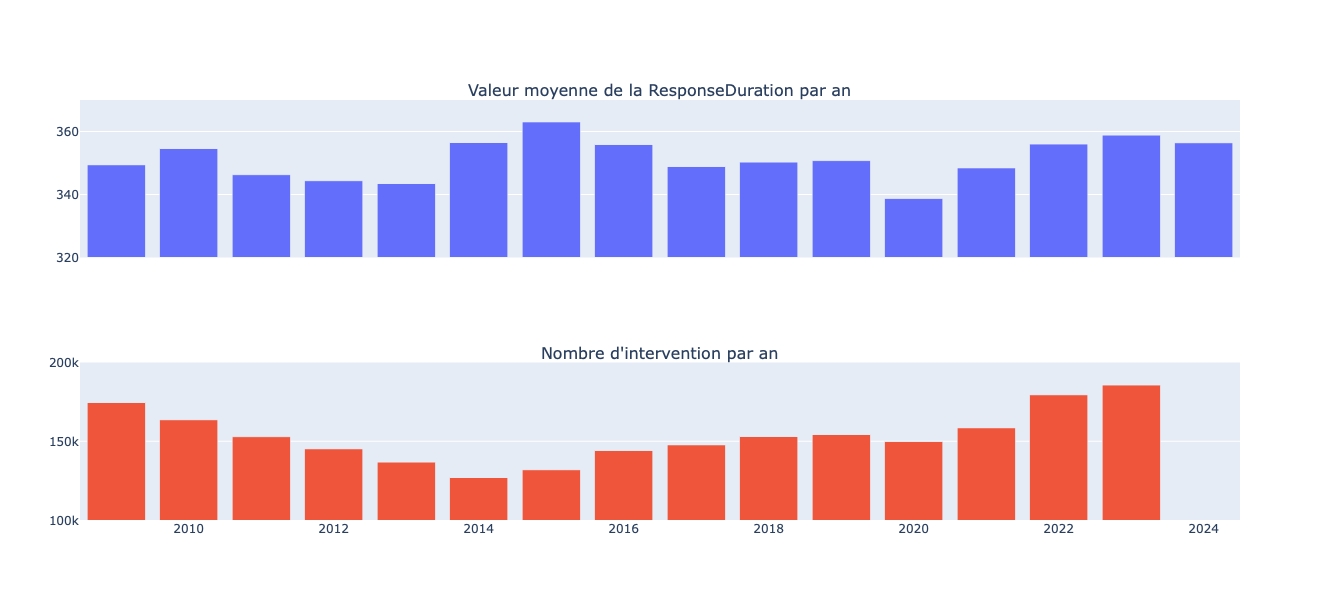

In [49]:
# Grouper par 'year' et calculer la moyenne des valeurs et leur nombre
grouped_mean = time_df.groupby('year')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('year')['ResponseDuration'].count().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Valeur moyenne de la ResponseDuration par an', "Nombre d'intervention par an"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['year'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['year'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1) 
fig.update_yaxes(range=[100000, 200000], row=2, col=1) 

# Mettre à jour les annotations et les titres
fig.update_layout(height=600, width=600, showlegend=False)

fig.write_html(racine_projet()+'/reports/figures/distrib_years.html')

fig.show()

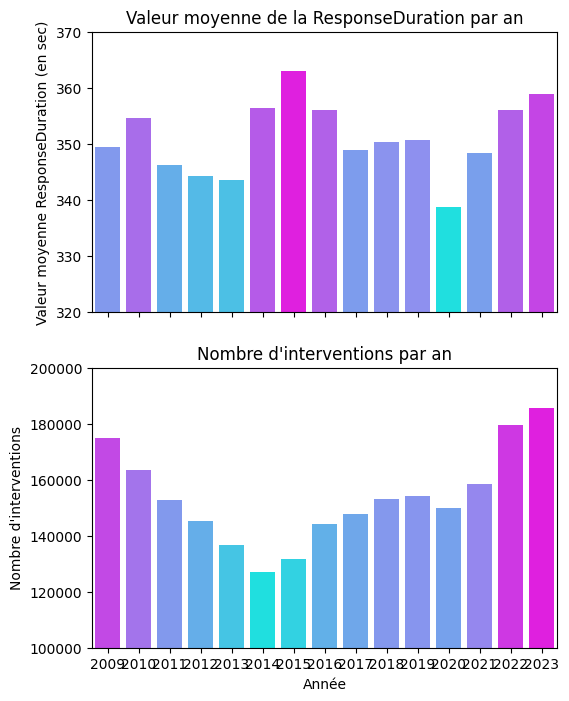

In [50]:
# Filtrer les données pour exclure l'année 2024
time_df_filtered = time_df[time_df['year'] != 2024]

# Calculer la moyenne et le compte par année
grouped_mean = time_df_filtered.groupby('year')['ResponseDuration'].mean().reset_index()
grouped_count = time_df_filtered.groupby('year')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='year', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='year', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par an')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='year', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='year', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par an")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(100000, 200000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque année", fontsize=16)
plt.xlabel('Année')

# Afficher le graphique
#plt.savefig(racine_projet()+'/reports/figures/distrib_years.png')

plt.show()

#### Month

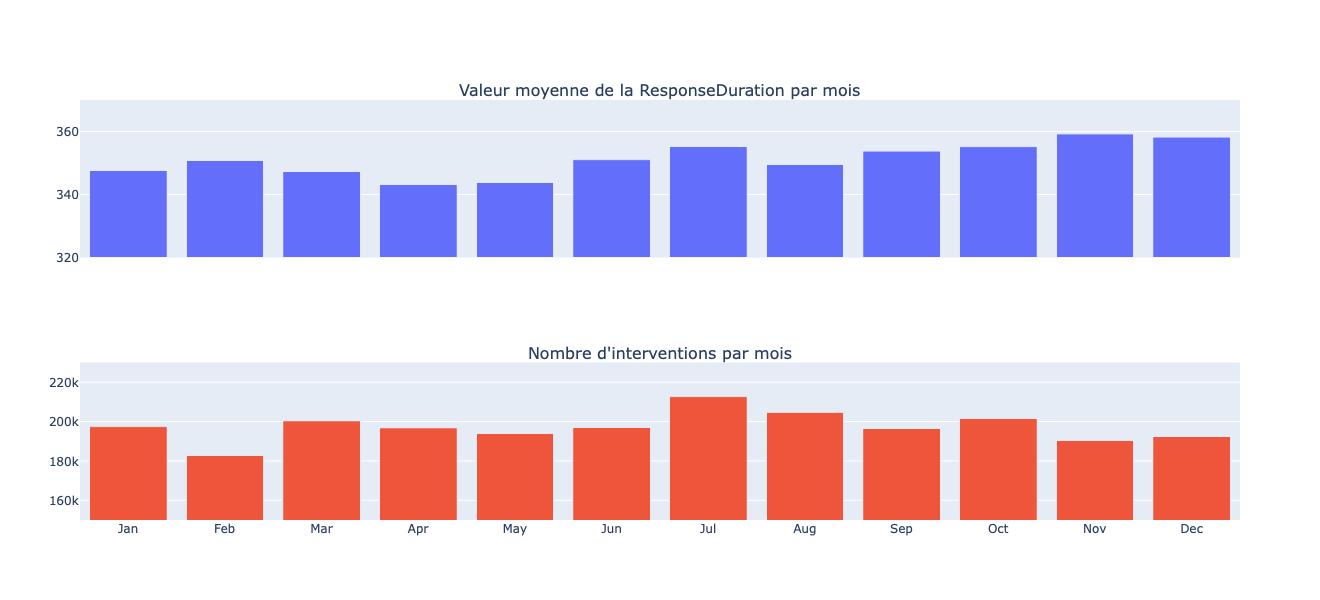

In [51]:
mois = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

time_df['month'] = time_df['month'].map(mois)

# Grouper par 'month' et calculer la moyenne des valeurs
grouped_mean = time_df.groupby('month')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('month')['ResponseDuration'].count().reset_index()

# Assurez-vous que les mois sont dans l'ordre correct
ordered_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
grouped_mean['month'] = pd.Categorical(grouped_mean['month'], categories=ordered_months, ordered=True)
grouped_count['month'] = pd.Categorical(grouped_count['month'], categories=ordered_months, ordered=True)

grouped_mean = grouped_mean.sort_values('month')
grouped_count = grouped_count.sort_values('month')

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Valeur moyenne de la ResponseDuration par mois', "Nombre d'interventions par mois"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['month'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['month'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot
fig.update_yaxes(range=[150000, 230000], row=2, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot


# Mettre à jour les annotations et les titres
fig.update_layout(height=600, width=600, showlegend=False)

fig.write_html(racine_projet()+'/reports/figures/distrib_month.html')

fig.show()

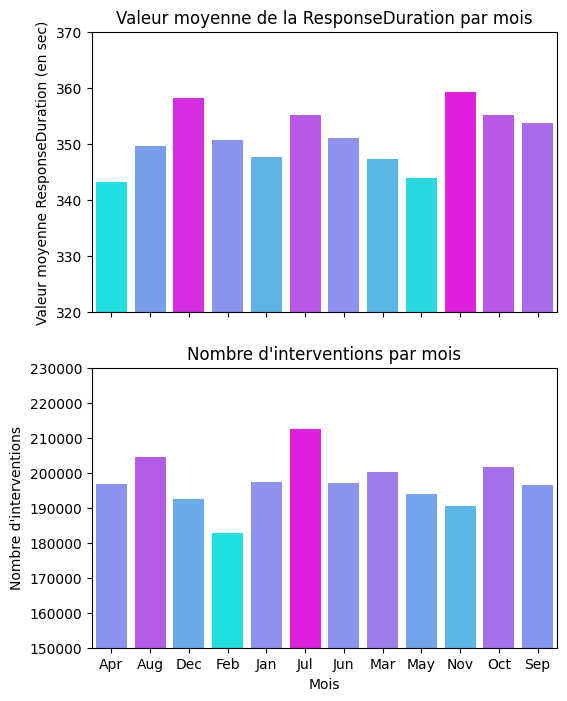

In [52]:
# Calculer la moyenne et le compte par mois
grouped_mean = time_df.groupby('month')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('month')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='month', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='month', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par mois')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='month', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='month', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par mois")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(150000, 230000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Mois')

# Afficher le graphique
plt.show()

#### Weekday

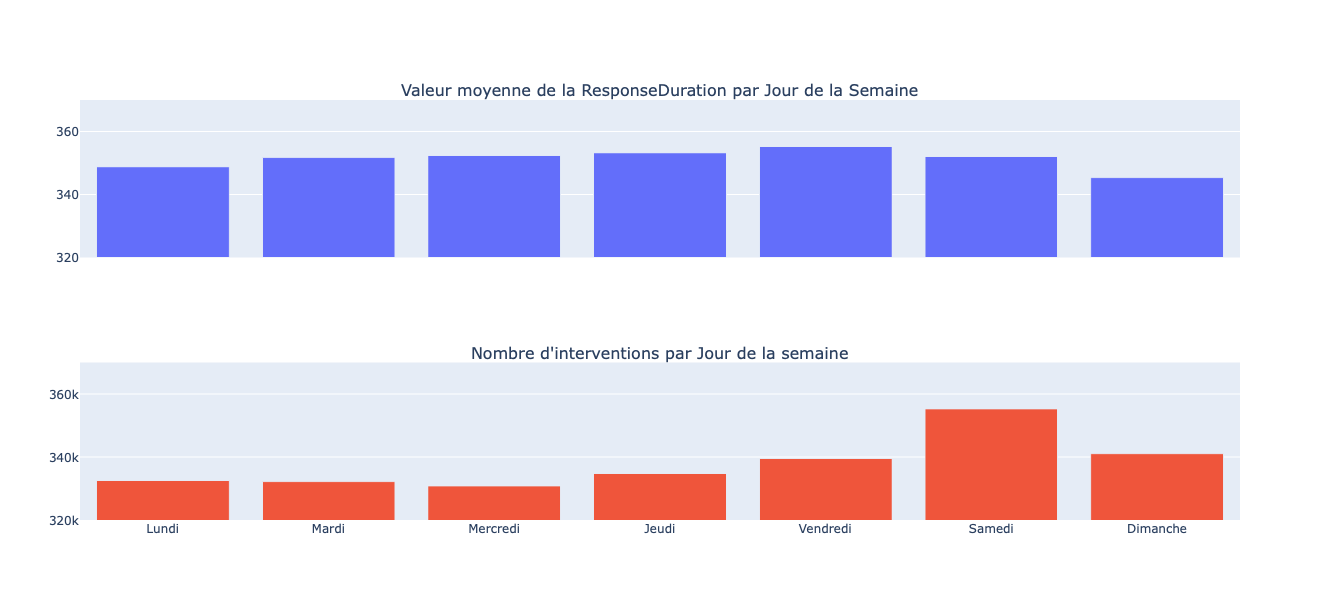

In [39]:
# Mappage des jours de la semaine
jours_semaine = {0: 'Lundi', 1: 'Mardi', 2: 'Mercredi', 3: 'Jeudi', 4: 'Vendredi', 5: 'Samedi', 6: 'Dimanche'}

# Remplacer les chiffres par les noms des jours
time_df['weekday'] = time_df['weekday'].map(jours_semaine)

# Grouper et calculer la moyenne et le nombre
grouped_mean = time_df.groupby('weekday')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('weekday')['ResponseDuration'].count().reset_index()

# Assurez-vous que les jours de la semaine sont dans l'ordre correct
ordered_days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
grouped_mean['weekday'] = pd.Categorical(grouped_mean['weekday'], categories=ordered_days, ordered=True)
grouped_count['weekday'] = pd.Categorical(grouped_count['weekday'], categories=ordered_days, ordered=True)

grouped_mean = grouped_mean.sort_values('weekday')
grouped_count = grouped_count.sort_values('weekday')

# Création des subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Valeur moyenne de la ResponseDuration par Jour de la Semaine', "Nombre d'interventions par Jour de la semaine"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['weekday'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['weekday'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot
fig.update_yaxes(range=[320000, 370000], row=2, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du deuxième subplot

# Mettre à jour les annotations et les titres
fig.update_layout(height=600, width=600, showlegend=False)

# Sauvegarder et afficher le graphique
fig.write_html(racine_projet()+'/reports/figures/distrib_day.html')
fig.show()

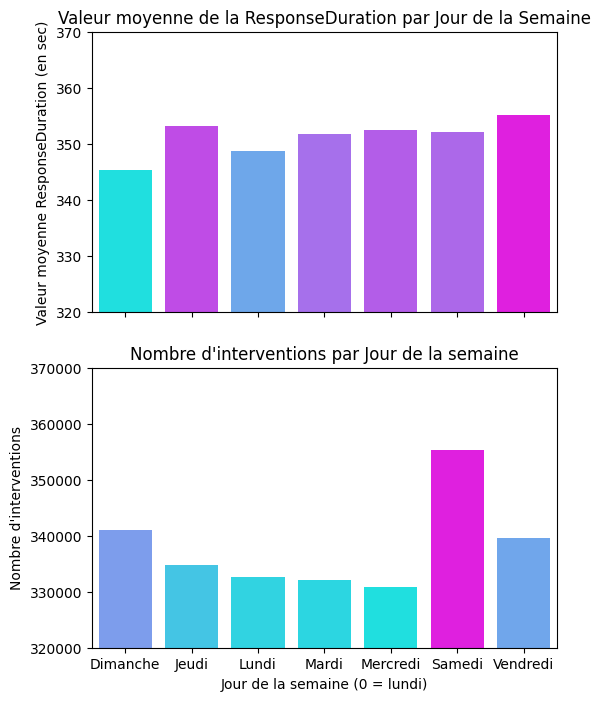

In [40]:
# Calculer la moyenne et le compte par jour de la semaine
grouped_mean = time_df.groupby('weekday')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('weekday')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='weekday', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='weekday', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par Jour de la Semaine')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='weekday', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='weekday', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par Jour de la semaine")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(320000, 370000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Jour de la semaine (0 = lundi)')

# Afficher le graphique
plt.show()

#### Hours

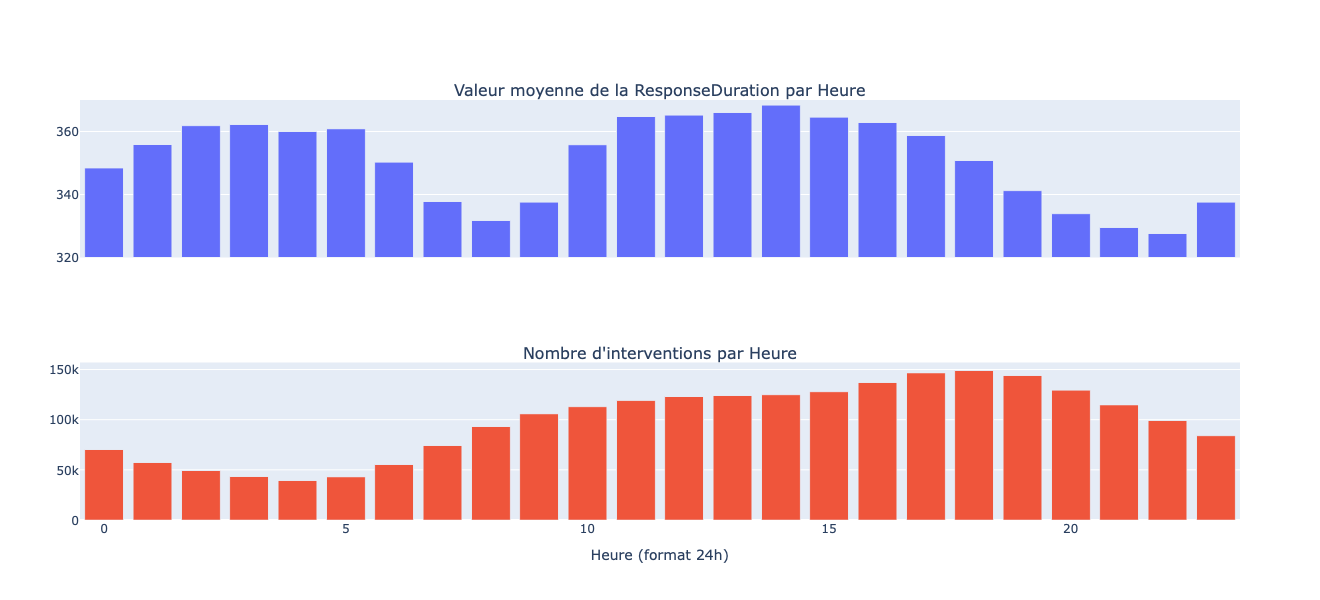

In [44]:
# Grouper par 'hour' et calculer la moyenne des valeurs
grouped_mean = time_df.groupby('hour')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('hour')['ResponseDuration'].count().reset_index()

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Valeur moyenne de la ResponseDuration par Heure', "Nombre d'interventions par Heure"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['hour'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['hour'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot

# Mettre à jour les annotations et les titres
fig.update_layout(height=600, width=800, showlegend=False)

fig.update_xaxes(title_text='Heure (format 24h)', row=2, col=1)

fig.write_html(racine_projet()+'/reports/figures/distrib_hours.html')

fig.show()

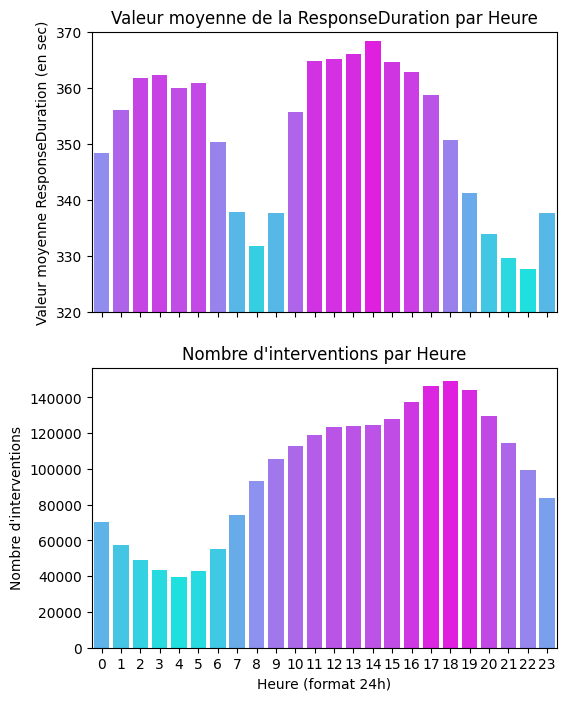

In [42]:
# Calculer la moyenne et le compte par heure
grouped_mean = time_df.groupby('hour')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('hour')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='hour', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='hour', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par Heure')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='hour', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='hour', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par Heure")
axs[1].set_ylabel("Nombre d'interventions")

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Heure (format 24h)')

# Afficher le graphique
plt.show()

### Countplots - variables diverses

#### StopCodeDescription

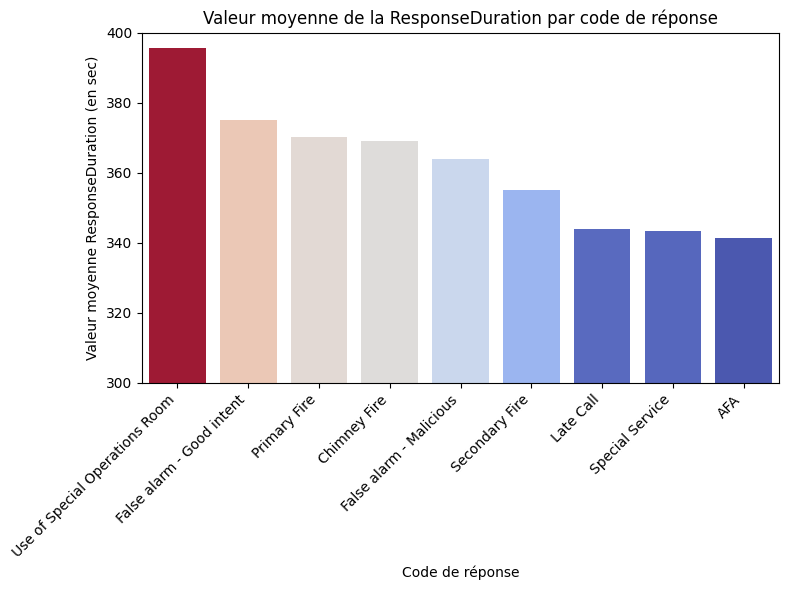

In [53]:
# Calculer la moyenne par 'StopCodeDescription'
grouped_mean = master_df.groupby('StopCodeDescription')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)

plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='StopCodeDescription', y='ResponseDuration', hue='StopCodeDescription', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par code de réponse')
plt.xlabel('Code de réponse')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 400)  
plt.xticks(rotation=45, ha='right') 

# Afficher le graphique
plt.tight_layout()
plt.savefig(racine_projet()+'/reports/figures/stopcode_response_duration.png')

plt.show()

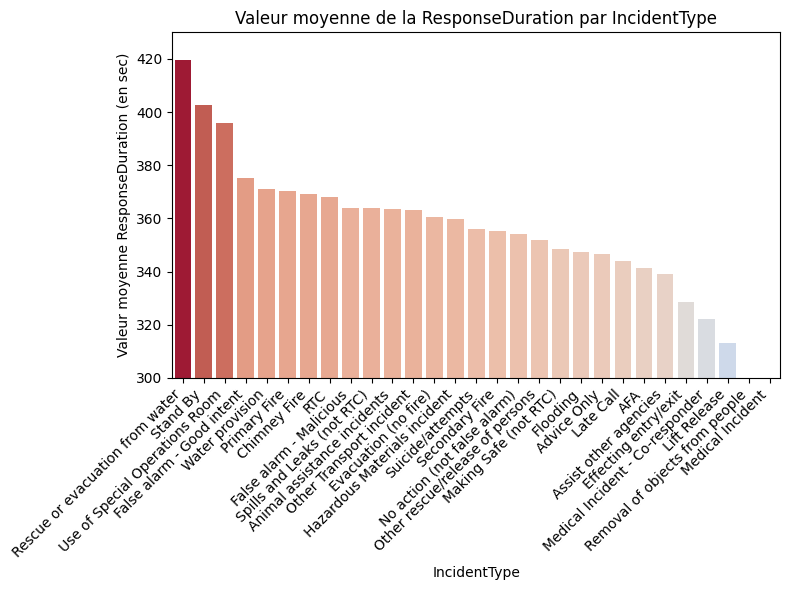

In [54]:
# Calculer la moyenne par IncidentType
grouped_mean = master_df.groupby('IncidentType')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)


# Créer une figure pour le graphique
plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='IncidentType', y='ResponseDuration', hue='IncidentType', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par IncidentType')
plt.xlabel('IncidentType')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 430)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

# Afficher le graphique
plt.tight_layout()
plt.savefig(racine_projet()+'/reports/figures/incidenttype_response_duration.png')
plt.show()

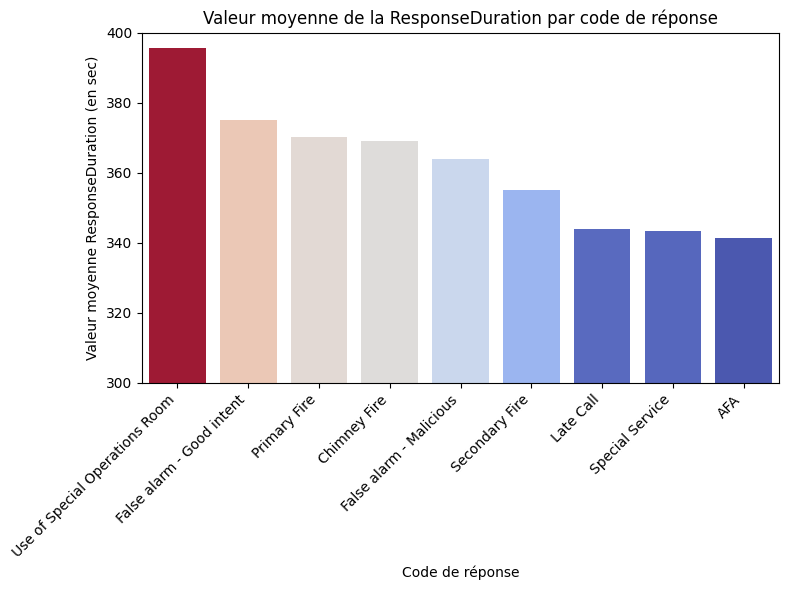

In [66]:
# Calculer la moyenne par 'StopCodeDescription'
grouped_mean = master_df.groupby('StopCodeDescription')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)

# Créer une figure pour le graphique
plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='StopCodeDescription', y='ResponseDuration', hue='StopCodeDescription', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par code de réponse')
plt.xlabel('Code de réponse')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 400)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

# Afficher le graphique
plt.tight_layout()
plt.show()

#### PropertyCategory / AddressQualifier

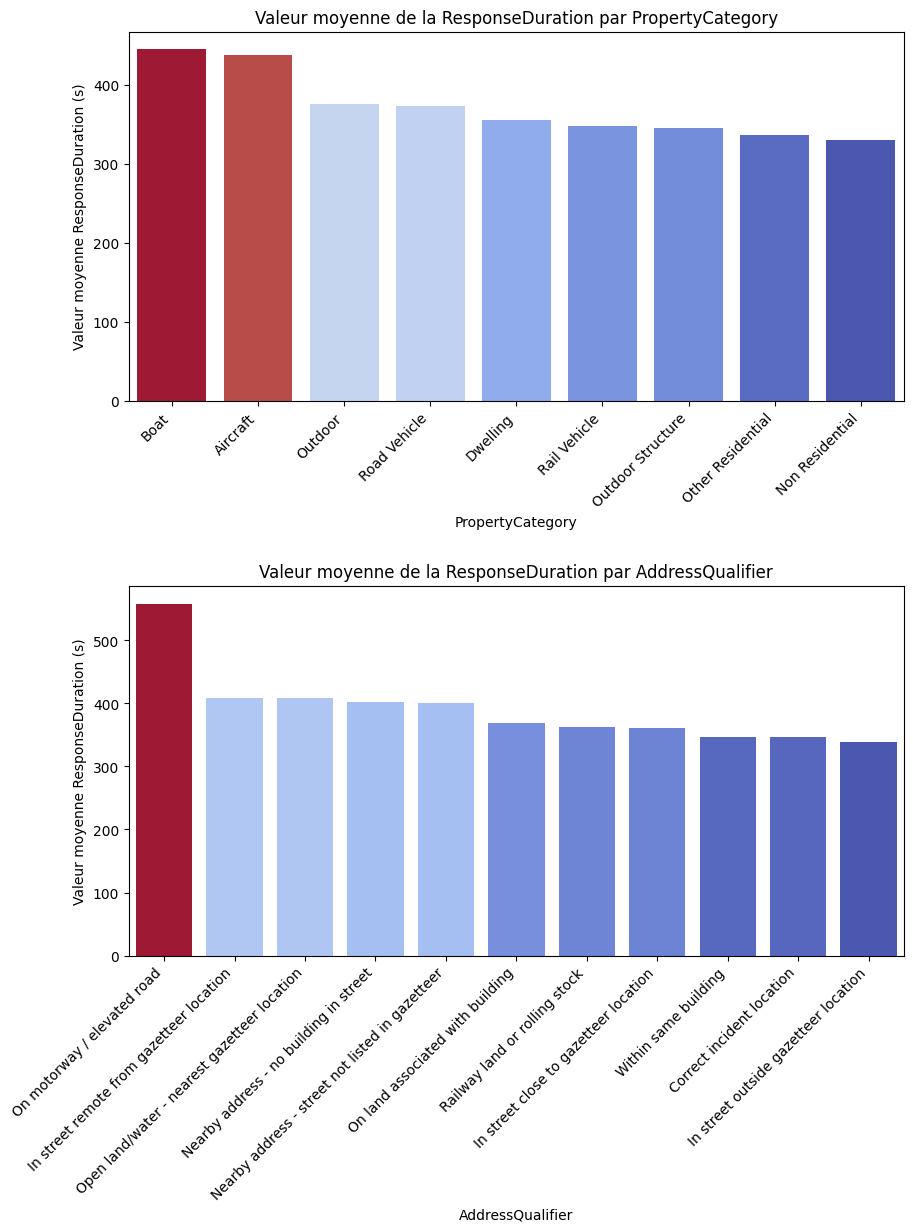

In [55]:
# Calculer la moyenne et le compte par année
grouped_mean1 = master_df.groupby('PropertyCategory')['ResponseDuration'].mean().reset_index()
grouped_mean2 = master_df.groupby('AddressQualifier')['ResponseDuration'].mean().reset_index()

grouped_mean1 = grouped_mean1.sort_values(by='ResponseDuration', ascending=False)
grouped_mean2 = grouped_mean2.sort_values(by='ResponseDuration', ascending=False)

# Créer une figure avec 2 sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean1_colors = list(normalize_color(grouped_mean1['ResponseDuration']))
sns.barplot(x='PropertyCategory', y='ResponseDuration', data=grouped_mean1, ax=axs[0], hue='PropertyCategory', palette=mean1_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par PropertyCategory')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (s)')
axs[0].set_xlabel('PropertyCategory')
axs[0].set_xticks(range(len(grouped_mean1)))  
axs[0].set_xticklabels(grouped_mean1['PropertyCategory'], rotation=45, ha='right')

# Ajouter le deuxième graphique (compte des valeurs)
mean2_colors = list(normalize_color(grouped_mean2['ResponseDuration']))
sns.barplot(x='AddressQualifier', y='ResponseDuration', data=grouped_mean2, ax=axs[1], hue='AddressQualifier', palette=mean2_colors, dodge=False, legend=False)
axs[1].set_title('Valeur moyenne de la ResponseDuration par AddressQualifier')
axs[1].set_ylabel("Valeur moyenne ResponseDuration (s)")
axs[1].set_xlabel('AddressQualifier')
axs[1].set_xticks(range(len(grouped_mean2)))  
axs[1].set_xticklabels(grouped_mean2['AddressQualifier'], rotation=45, ha='right')

# Ajouter de l'espace entre les deux graphiques
fig.subplots_adjust(hspace=0.5) 

# Afficher le graphique
plt.savefig(racine_projet()+'/reports/figures/prop_category_response_duration.png')

plt.show()

#### Station de pompiers

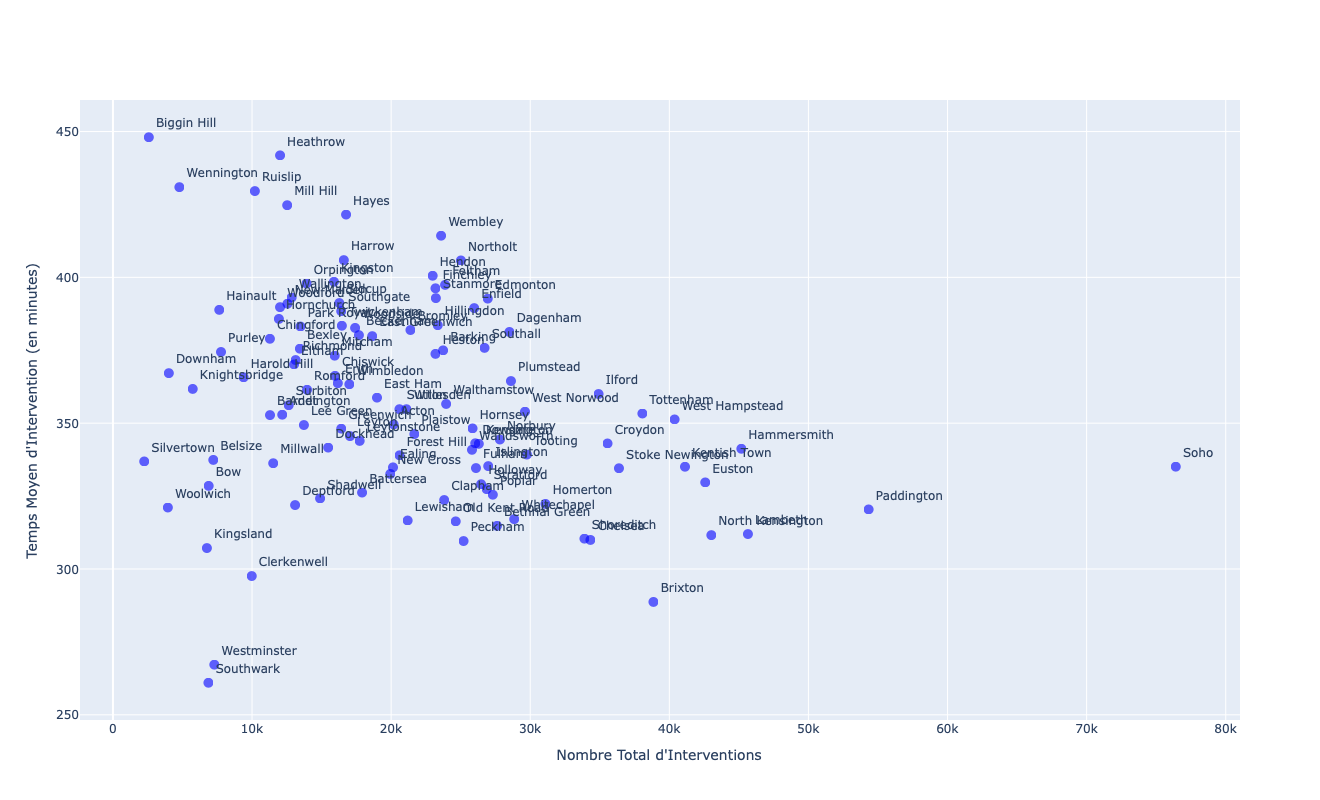

In [67]:
# Grouper par 'station' pour calculer le nombre d'interventions et la durée moyenne
grouped = master_df.groupby('DeployedFromStation_Name').agg(
            interventions=('ResponseDuration', 'count'),
            average_duration=('ResponseDuration', 'mean')
            ).reset_index()

grouped = grouped[grouped['interventions'] >= 1000]

# Créer le scatter plot
fig = go.Figure()

# Ajouter les points du scatter plot
fig.add_trace(go.Scatter(
    x=grouped['interventions'],
    y=grouped['average_duration'],
    mode='markers+text',
    text=grouped['DeployedFromStation_Name'],
    textposition='top right',
    marker=dict(size=10, color='blue', opacity=0.6),
    name='Stations'
))

# Mettre à jour les axes et le titre
fig.update_layout(
    #title='Nombre d\'Interventions vs Temps Moyen d\'Intervention par Station',
    xaxis_title='Nombre Total d\'Interventions',
    yaxis_title='Temps Moyen d\'Intervention (en minutes)',
    height = 800,
    width = 800
)

# Sauvegarder et afficher le graphique
fig.write_html(racine_projet()+'/reports/figures/scatter_plot_stations.html')
fig.show()
